# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     834.7
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           4.26e-40
Time:                        21:29:14   Log-Likelihood:                -1.5958
No. Observations:                  50   AIC:                             11.19
Df Residuals:                      46   BIC:                             18.84
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9525      0.089     55.788      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.43744603  4.94431864  5.40814412  5.79868426  6.09661368  6.29669488
  6.40863882  6.45550938  6.46993405  6.48874334  6.5469196   6.67184955
  6.87882469  7.16852898  7.52692645  7.92756726  8.33593336  8.71510969
  9.03184923  9.26203537  9.39464424  9.43355585  9.39691667  9.31415816
  9.22116131  9.15436149  9.14476219  9.21284125  9.36518643  9.59341304
  9.87554152 10.17960861 10.46891886 10.70807355 10.86878662 10.93453197
 10.9032587  10.78772799 10.61341654 10.4143308  10.22741979 10.0865045
 10.0167212  10.0303916  10.12499844 10.28359908 10.47760912 10.67149872
 10.82863007 10.91727688]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.90199069 10.74099082 10.45603593 10.09671126  9.72828846  9.41574477
  9.20785435  9.12524666  9.15535565  9.25549637]


## Plot comparison

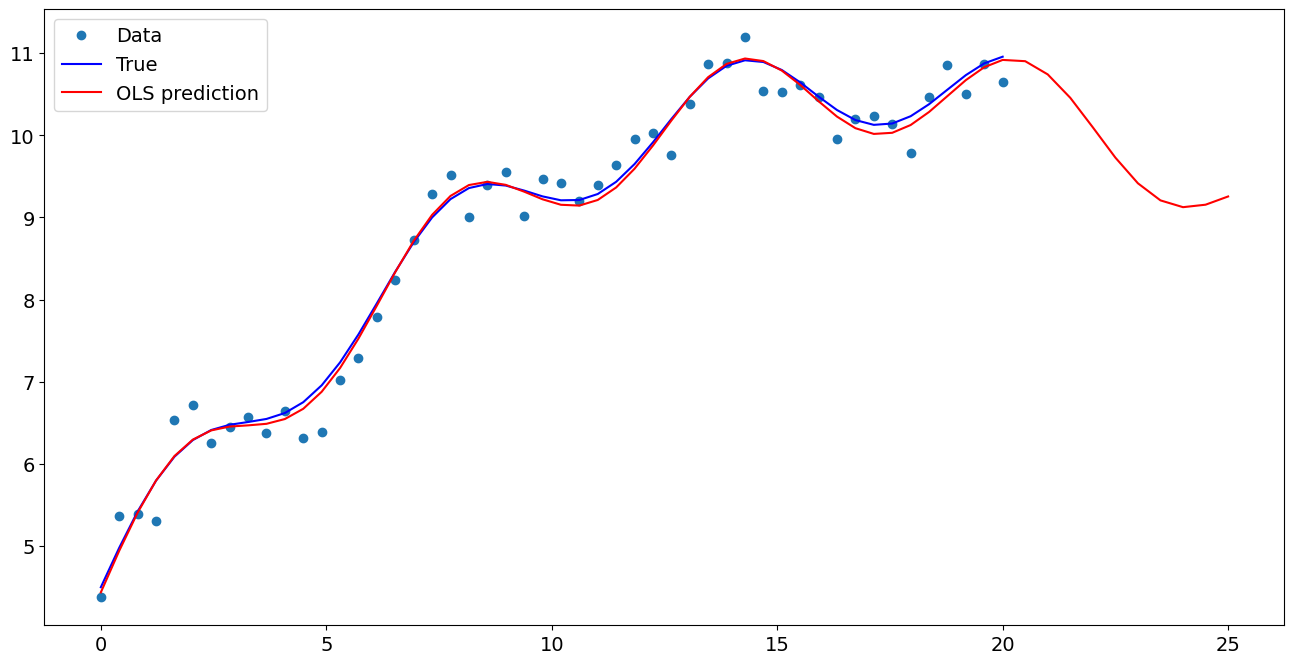

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.952473
x1                  0.504675
np.sin(x1)          0.554838
I((x1 - 5) ** 2)   -0.020601
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.901991
1    10.740991
2    10.456036
3    10.096711
4     9.728288
5     9.415745
6     9.207854
7     9.125247
8     9.155356
9     9.255496
dtype: float64